### **Vivek Dadhich**

### **20MAI0077**

### Repository-link -> https://github.com/vivek20dadhich/CSE6037-Deep-Learning-and-its-Applications-Lab-Assignments

 Task 2 -> Write a python code to implement the VGG 16 .  
-	Dataset as any image dataset but here you have to add the data augmentation (Eg: 10000images then make as 15000images using data augmentation scheme).
-	Include batch normalization at the anyplace followed by first convolution 
-	Optimization SGD
<br /><br />

**Very Deep Convolutional Networks for Large-Scale Image Recognition(VGG-16)**

The VGG-16 is one of the most popular pre-trained models for image classification. Introduced in the famous ILSVRC 2014 Conference, it was and remains THE model to beat even today. Developed at the Visual Graphics Group at the University of Oxford, VGG-16 beat the then standard of AlexNet and was quickly adopted by researchers and the industry for their image Classification Tasks.

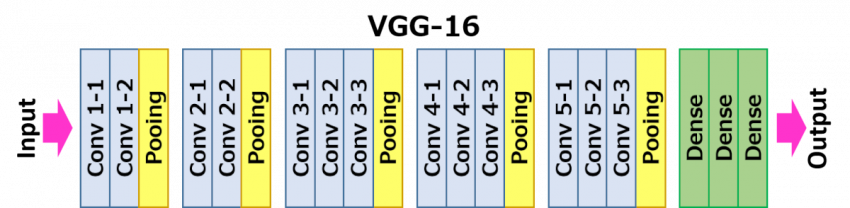

The following are the layers of the model:

- Convolutional Layers = 13
- Pooling Layers = 5
- Dense Layers = 3
<br></br>


In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-04-13 02:09:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.176, 172.217.7.208, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   132MB/s    in 0.5s    

2021-04-13 02:10:00 (132 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

**Preparing the Dataset**


We will first prepare the dataset and separate out the images:

First divide the folder contents into the train and validation directories.
Then, in each of the directories, create a separate directory for cats that contains only cat images, and a separate director for dogs having only dog images.

In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

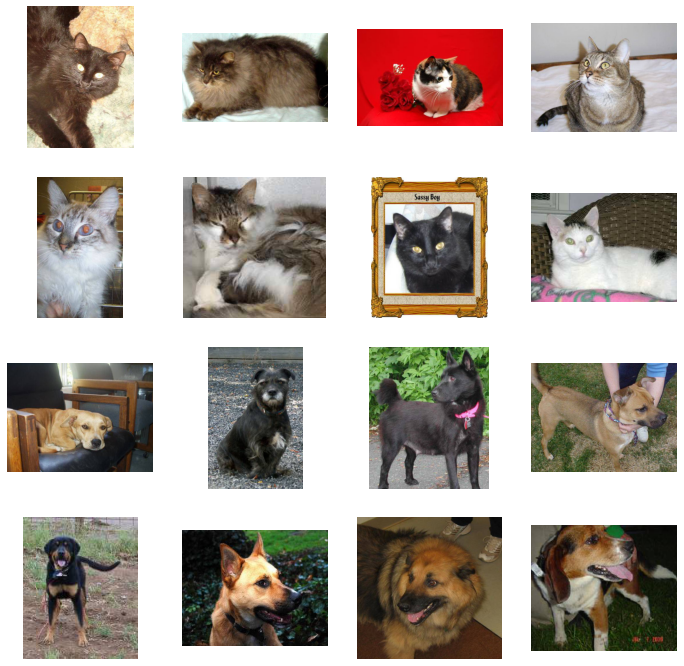

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Let us now explore how to train a VGG-16 model on our dataset-

**Step 1**: Image Augmentation

Since we took up a much smaller dataset of images earlier, we can make up for it by augmenting this data and increasing our dataset size. If you are working with the original larger dataset, you can skip this step and move straight on to building the model.

In [6]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

**Step 2:** Training and Validation Sets

In [7]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Step 3**: Loading the Base Model

We will be using only the basic models, with changes made only to the final layer. This is because this is just a binary classification problem while these models are built to handle up to 1000 classes.

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [9]:
for layer in base_model.layers:
    layer.trainable = False

**Step 4:** Compile and Fit

We will then build the last fully-connected layer. I have just used the basic settings, but feel free to experiment with different values of dropout, and different Optimisers and activation functions.

In [10]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [11]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
#vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch =10 , epochs = 10)
H = model.fit_generator(train_generator,validation_data=validation_generator,epochs=100, validation_steps=validation_size//batch_size, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 1336s 13s/step - loss: 0.7600 - accuracy: 0.5320 - val_loss: 0.5973 - val_accuracy: 0.6300
Epoch 2/100
100/100 [==============================] - 1331s 13s/step - loss: 0.6315 - accuracy: 0.6332 - val_loss: 0.5221 - val_accuracy: 0.7580
Epoch 3/100
100/100 [==============================] - 1328s 13s/step - loss: 0.5980 - accuracy: 0.6758 - val_loss: 0.4549 - val_accuracy: 0.8310
Epoch 4/100
100/100 [==============================] - 1328s 13s/step - loss: 0.5570 - accuracy: 0.7134 - val_loss: 0.4419 - val_accuracy: 0.8180
Epoch 5/100
100/100 [==============================] - 1328s 13s/step - loss: 0.5257 - accuracy: 0.7463 - val_loss: 0.4150 - val_accuracy: 0.8400
Epoch 6/100
100/100 [==============================] - 1328s 13s/step - loss: 0.5008 - accuracy: 0.7606 - val_loss: 0.3795 - val_accuracy: 0.8530
Epoch 7/100
100/100 [==============================] - ETA: 0s - loss: 0.5083 - accuracy: 0.7493